In [1]:
%config Completer.use_jedi = False

In [2]:
import pandas as pd
import hydrobr
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap
import geopandas as gpd
import geobr
# from matplotlib_scalebar.scalebar import ScaleBar
# from geodatasets import get_path
# import matplotlib.dates as mdates
# from datetime import datetime, timedelta
# import glob
# import rtree
# import openpyxl

c:\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
# Caminhos dos diretórios raiz
# general_path = 'C:/Users/cnalm/OneDrive/Hidroweb'    # Caminho do projeto (Cristiano)
# general_path = 'D:/Dados_Nuvem/OneDrive/Hidroweb'   # Colocar aqui o caminho de Filipe
general_path = 'C:/Users/linde/OneDrive/Hidroweb'   # Colocar aqui o caminho de Lindemberg

In [4]:
df_downloaded_station_info = hydrobr.get_data.ANA.list_prec_stations() 
df_downloaded_station_info.tail(2500)

,Name,Code,Type,SubBasin,City,State,Responsible,Latitude,Longitude,StartDate,EndDate,NYD,MD,N_YWOMD,YWMD
9476,RIBEIRÃO ACIMA,02346352,2,62,NAZARÉ PAULISTA,SÃO PAULO,DAEE-SP,-23.1833,-46.3333,1972/12/15,2000/09/25,29,0.6,21,27.6
9477,CIDADE UNIVERSITÁRIA,02346353,2,62,SÃO PAULO,SÃO PAULO,DAEE-SP,-23.5667,-46.7333,1973/07/01,1993/02/28,21,0.2,17,19.0
9478,TAIACUPEBA,02346356,2,62,MOGI DAS CRUZES,SÃO PAULO,DAEE-SP,-23.6667,-46.1833,1958/05/01,1988/01/31,31,1.6,20,35.5
9479,SÃO PAULO (INST. BUTANTAN),02346368,2,62,SÃO PAULO,SÃO PAULO,DAEE-SP,-23.5667,-46.7333,1907/08/01,1916/12/31,10,0.9,8,20.0
9480,SÃO PAULO (AV. PAULISTA),02346369,2,62,SÃO PAULO,SÃO PAULO,DAEE-SP,-23.5667,-46.6667,1903/01/01,1936/02/29,34,1.5,29,14.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11971,NOVA ESPERANÇA/MARCO BV-8,08461000,2,14,PACARAIMA,RORAIMA,ANA,4.4883,-61.1297,1984/03/23,2019/06/30,36,12.3,13,63.9
11972,MISSÃO AUARIS - JUSANTE,08464001,2,14,BOA VISTA,RORAIMA,ANA,4.0031,-64.4431,1995/04/01,2019/06/30,25,4.2,15,40.0
11973,WILLIAM KRAANPLEIN,08555060,2,90,SURINAME,SURINAME,SURINAME,5.8000,-55.1667,1935/08/01,1948/12/31,14,9.2,7,50.0
11974,ZANDERIJ,08555096,2,90,SURINAME,SURINAME,SURINAME,5.4700,-55.2000,2009/01/31,2010/01/31,2,96.7,0,100.0


In [5]:
df_raw_1961_2020 = pd.read_hdf(general_path+'/Quality/BRASIL_Q_QUALITY_INDEX_by_month.h5')
df_raw_1961_2020 = df_raw_1961_2020[df_raw_1961_2020['Date'] < '2021-01-01']
df_raw_1961_2020 = df_raw_1961_2020[df_raw_1961_2020['Date'] >= '1961-01-01']
df_raw_1961_2020['Year'] = df_raw_1961_2020['Date'].dt.year
df_raw_1961_2020

,Code,Date,State,Availability,Gaps,Weekday,Outlier,Quality Index,Quality Label,Year
0,00771001,1982-07-01,ACRE,100.000000,100.000000,55.278640,100.000000,88.819660,Good Quality,1982
1,00771001,1982-08-01,ACRE,100.000000,100.000000,38.032266,100.000000,84.508067,Acceptable Quality,1982
2,00771001,1982-09-01,ACRE,100.000000,100.000000,54.621904,100.000000,88.655476,Good Quality,1982
3,00771001,1982-10-01,ACRE,100.000000,100.000000,65.007289,96.774194,90.445371,Excellent Quality,1982
4,00771001,1982-11-01,ACRE,100.000000,100.000000,57.836298,100.000000,89.459074,Good Quality,1982
...,...,...,...,...,...,...,...,...,...,...
4266859,01348002,1999-01-01,TOCANTINS,100.000000,100.000000,55.904145,96.774194,88.169585,Good Quality,1999
4266860,01348002,1999-02-01,TOCANTINS,100.000000,100.000000,53.310271,100.000000,88.327568,Good Quality,1999
4266861,01348002,1999-03-01,TOCANTINS,67.741935,3.225806,59.175171,100.000000,57.535728,Low Quality,1999
4266862,01348002,1999-04-01,TOCANTINS,100.000000,100.000000,100.000000,100.000000,100.000000,Excellent Quality,1999


In [6]:
df_cut_code = pd.DataFrame(df_raw_1961_2020['Code'].drop_duplicates().reset_index(drop = True, inplace = False))
df_cut_code

,Code
0,00771001
1,00772000
2,00772001
3,00772003
4,00772004
...,...
11123,01249002
11124,01249003
11125,01249004
11126,01249005


In [7]:
df_year_records = pd.read_hdf(general_path+'/Consolidated Files/BRASIL_RAW_1961_2022.h5')
df_year_records = df_year_records[df_year_records['Date'] < '2021-01-01']
df_year_records = df_year_records[df_year_records['Date'] >= '1961-01-01']
df_year_records['Year'] = df_year_records['Date'].dt.year
df_year_records = df_year_records[['Year','Code']].groupby(['Year']).count().reset_index(drop = False)
df_year_records.columns =  ['year', 'record_count']
df_year_records

,year,record_count
0,1961,1143141
1,1962,1260095
2,1963,1442920
3,1964,1499246
4,1965,1528470
5,1966,1589339
6,1967,1623695
7,1968,1665705
8,1969,1691746
9,1970,1761295


In [8]:
df_year_records.sum()

year               119430
record_count    103022877
dtype: int64

In [9]:
df_downloaded_station_info = pd.merge(df_cut_code, df_downloaded_station_info, how = 'left', on = 'Code')
df_downloaded_station_info

,Code,Name,Type,SubBasin,City,State,Responsible,Latitude,Longitude,StartDate,EndDate,NYD,MD,N_YWOMD,YWMD
0,00771001,FAZENDA PARANACRE,2,12,TARAUACÁ,ACRE,ANA,-7.9511,-71.4822,1982/07/01,2019/12/31,38,17.3,19,50.0
1,00772000,CRUZEIRO DO SUL,2,12,CRUZEIRO DO SUL,ACRE,INMET,-7.6111,-72.6811,1961/01/01,1996/04/30,36,37.0,18,50.0
2,00772001,COLOCAÇÃO SÃO FRANCISCO,2,12,TARAUACÁ,ACRE,ANA,-8.0178,-72.0347,1992/11/02,2012/06/14,21,7.9,11,47.6
3,00772003,SERINGAL BOM FUTURO,2,12,TARAUACÁ,ACRE,ANA,-7.8503,-72.0192,1992/11/03,2019/12/31,28,10.2,16,42.9
4,00772004,CRUZEIRO DO SUL,2,12,CRUZEIRO DO SUL,ACRE,ANA,-7.6472,-72.6769,2015/10/09,2019/11/30,5,0.9,2,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11123,01249002,PROJETO RIO FORMOSO,2,26,FORMOSO DO ARAGUAIA,TOCANTINS,ANA,-11.8394,-49.7717,1980/12/06,2019/07/31,40,12.4,26,35.0
11124,01249003,BARREIRA DO PEQUI,2,26,SANDOLÂNDIA,TOCANTINS,ANA,-12.0986,-49.9475,1984/04/26,2019/10/31,36,9.8,22,38.9
11125,01249004,PRAIA ALTA,2,26,SANDOLÂNDIA,TOCANTINS,ANA,-12.4181,-49.5900,1986/06/01,2019/10/31,34,5.8,23,32.4
11126,01249005,SANDOLÂNDIA,2,26,SANDOLÂNDIA,TOCANTINS,ANA,-12.5336,-49.9319,2004/08/01,2019/07/31,16,2.8,11,31.2


In [10]:
df_order = df_downloaded_station_info.sort_values(by=["StartDate"])
df_order

,Code,Name,Type,SubBasin,City,State,Responsible,Latitude,Longitude,StartDate,EndDate,NYD,MD,N_YWOMD,YWMD
4452,01943000,MINERAÇÃO MORRO VELHO,2,41,NOVA LIMA,MINAS GERAIS,ANA,-19.9792,-43.8500,1855/01/31,2018/07/31,164,59.6,58,64.6
10704,02347026,TATUÍ,2,62,TATUÍ,SÃO PAULO,DAEE-SP,-23.3667,-47.8500,1888/01/01,2007/05/31,120,13.0,89,25.8
10458,02346045,LUZ (ESTAÇÃO),2,62,SÃO PAULO,SÃO PAULO,DAEE-SP,-23.5333,-46.6333,1888/01/01,2004/09/30,117,3.9,92,21.4
5665,02549006,CURITIBA,2,65,CURITIBA,PARANÁ,ANA,-25.4333,-49.2667,1889/01/01,2017/09/30,129,4.4,111,14.0
4844,02144032,SÃO JOÃO DEL REI,2,61,SÃO JOÃO DEL REI,MINAS GERAIS,INMET,-21.1333,-44.2667,1889/06/10,1998/11/30,110,32.9,61,44.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8750,02649178,PCH ALTO BENEDITO II JUSANTE,2,83,BENEDITO NOVO,SANTA CATARINA,SENS,-26.7758,-49.3719,2018/04/14,2018/12/31,1,0.0,0,100.0
2768,00739081,DOM LEME,2,36,SANTANA DO CARIRI,CEARÁ,FUNCEME-CE,-7.3067,-39.7689,2018/04/22,2020/02/29,3,0.0,1,66.7
5396,02450077,UHE TIBAGI MONTANTE JUSANTE,2,64,TIBAGI,PARANÁ,TIBAGI,-24.5275,-50.4072,2018/05/23,2018/09/30,1,0.0,0,100.0
5397,02450078,UHE TIBAGI MONTANTE RIO CAPIVARI,2,64,TIBAGI,PARANÁ,TIBAGI,-24.6533,-50.4528,2018/05/31,2018/11/30,1,0.0,0,100.0


In [11]:
df_state = df_downloaded_station_info[['Code', 'State']]
data_state = pd.pivot_table(df_state, values='Code', index=['State'], aggfunc=np.count_nonzero)
data_state.sort_values('Code', inplace=True, ascending=False)
data_state.reset_index(inplace=True)
data_state

,State,Code
0,SÃO PAULO,1994
1,BAHIA,1192
2,PARANÁ,1157
3,CEARÁ,1133
4,MINAS GERAIS,1024
5,RIO GRANDE DO SUL,514
6,RIO DE JANEIRO,420
7,PERNAMBUCO,360
8,PARAÍBA,337
9,PIAUÍ,321


In [12]:
data_state.to_excel(general_path+"/Docs/data_station_by_state.xlsx",
             sheet_name='station_by_state', index = False)

In [13]:
data_state["Code"].sum()

11128

In [14]:
labels = data_state["Code"].values.tolist()
labels

[1994,
 1192,
 1157,
 1133,
 1024,
 514,
 420,
 360,
 337,
 321,
 285,
 268,
 264,
 264,
 240,
 224,
 186,
 169,
 164,
 109,
 98,
 95,
 84,
 83,
 55,
 50,
 38]

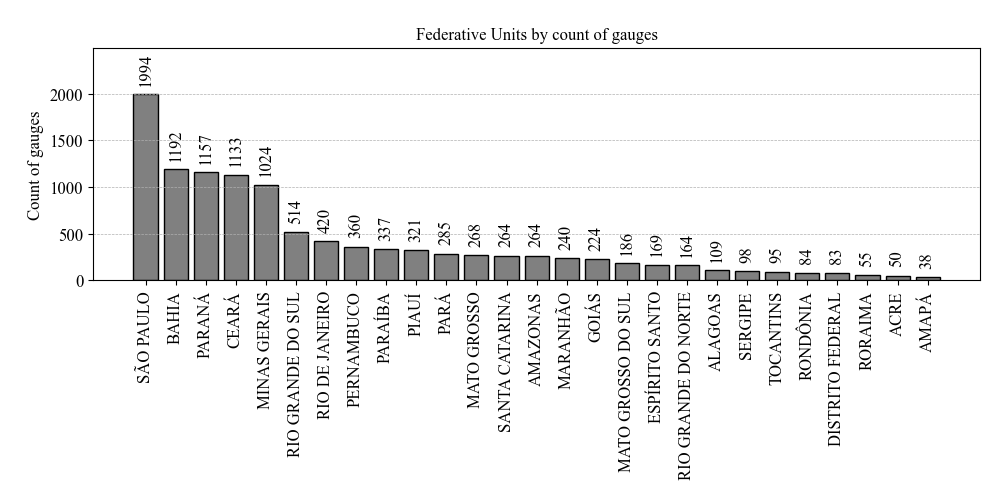

In [15]:
fig, ax = plt.subplots(figsize = (10, 5))

ax.bar(data_state['State'], data_state['Code'], color='grey', edgecolor = 'black')

tnr = {'fontname':'Times New Roman', 'fontsize':12}

plt.setp(plt.gca().get_xticklabels(), rotation = 90, **tnr)
plt.setp(plt.gca().get_yticklabels(), **tnr)
ax.set_ylim(None,max(labels)*1.25)

ax.set_title("\nFederative Units by count of gauges", **tnr)
ax.set_ylabel("\nCount of gauges", **tnr)

# Make some labels.
rects = ax.patches
  
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height+100, label,
            ha='center', va='bottom', rotation = 90, **tnr)

plt.grid(linestyle = '--', linewidth = 0.5, axis="y")
plt.tight_layout() 

plt.savefig(general_path+'/Figures/stations_by_state_en_1961_2020.jpeg', format='jpeg', dpi=1200, bbox_inches='tight') 
plt.show()
plt.close()

In [16]:
df_downloaded_station_year = pd.read_hdf(general_path + '/Consolidated Files/BRASIL_RAW_STATION_BY_YEAR.h5')
df_downloaded_station_year = df_downloaded_station_year[df_downloaded_station_year['Year'] >= 1961]
df_downloaded_station_year = df_downloaded_station_year[df_downloaded_station_year['Year'] <= 2020]
df_downloaded_station_year

,Code,Year
3,00047000,1961
4,00047000,1962
5,00047000,1963
6,00047000,1964
7,00047002,1977
...,...,...
378658,08560000,1992
378659,08560000,1993
378660,08560000,1994
378661,08560000,1995


In [17]:
df_count = df_downloaded_station_year.copy(deep = True)
df_count['Year'] = 1
# df_count = pd.merge(df_cut_code, df_count, on='Code', how='left')
df_count

,Code,Year
3,00047000,1
4,00047000,1
5,00047000,1
6,00047000,1
7,00047002,1
...,...,...
378658,08560000,1
378659,08560000,1
378660,08560000,1
378661,08560000,1


In [18]:
df_years_of_activity = pd.pivot_table(df_count, values='Year', index=['Code'], aggfunc=np.sum)
df_years_of_activity = df_years_of_activity.sort_values(by = ["Year"]).reset_index(drop=False)
df_years_of_activity

C:\Users\linde\AppData\Local\Temp\ipykernel_16724\1736309384.py:1: FutureWarning: The provided callable <function sum at 0x000001B96294B9C0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_years_of_activity = pd.pivot_table(df_count, values='Year', index=['Code'], aggfunc=np.sum)


,Code,Year
0,03054017,1
1,02243320,1
2,02243321,1
3,02243322,1
4,01843010,1
...,...,...
11123,02143022,60
11124,01943008,60
11125,02749000,60
11126,02143016,60


In [19]:
df_teste = df_years_of_activity[df_years_of_activity['Year']>=30]
df_teste['Code'].count()/df_years_of_activity['Code'].count()

0.43026599568655644

In [20]:
bins = [0, 10, 20, 30, 40, 50, 60]

In [21]:
years_of_act = np.array(df_years_of_activity['Year'])

height 2107.0
height 2164.0
height 2069.0
height 1896.0
height 1468.0
height 1424.0
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed',

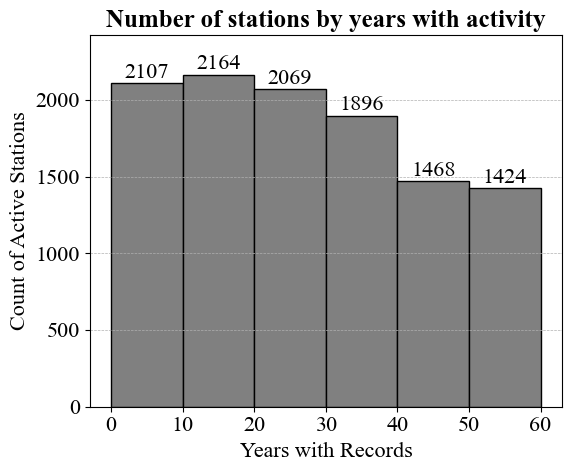

In [22]:
plt.rcParams['font.size'] = '16'
plt.rcParams["font.family"] = "Times New Roman"
tnr_title = {'fontname':'Times New Roman', "fontweight" :"bold", 'fontsize': 18}

# Creating histogram
fig, ax = plt.subplots(figsize=(6,5))
ax.hist(years_of_act, bins = bins, edgecolor = 'black', color = 'grey')

tnr = {'fontname':'Times New Roman', 'fontsize':12}

# Set title
ax.set_title('Number of stations by years with activity', **tnr_title)

  
# adding labels
ax.set_xlabel('Years with Records')
ax.set_ylabel('Count of Active Stations')
ax.set_xticks(bins)
ax.set_xticklabels(bins)
# Make some labels.
rects = ax.patches
height_list = []
max_label = 0
for rect in rects:
    height = rect.get_height()
    height_list.append(height)
    label = str(int(height))
    if max_label < height:
        max_label = height
    print("height", height)
    ax.text(rect.get_x() + rect.get_width() / 2, height+2, label,
            ha='center', va='bottom')
ax.set_ylim(0, math.ceil(max_label/100)*110)
# Show plot
plt.setp(plt.gca().get_xticklabels())
plt.setp(plt.gca().get_yticklabels())
plt.grid(linestyle = '--', linewidth = 0.5, axis = 'y')
plt.tight_layout() 
plt.savefig(general_path+'/Figures/station_distribution_years_of_activity_1961_2020.jpeg', format='jpeg', dpi=1200, bbox_inches='tight') 
plt.show()

In [23]:
data = pd.pivot_table(df_downloaded_station_year, values='Code', index=['Year'], aggfunc=np.count_nonzero)
data.reset_index(inplace=True)
data

,Year,Code
0,1961,3329
1,1962,3969
2,1963,4273
3,1964,4468
4,1965,4541
5,1966,4623
6,1967,4733
7,1968,4784
8,1969,4899
9,1970,5089


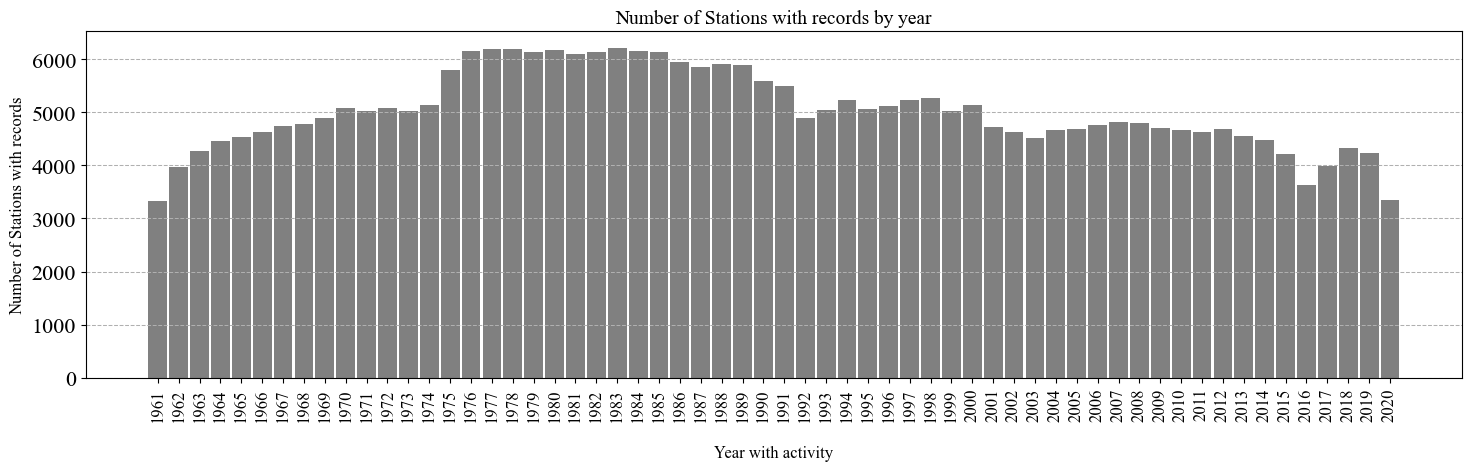

In [24]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(data['Year'], data['Code'], color='grey',width=0.9)
ax.set_xticks(data['Year'].values.tolist())
ax.set_xticklabels(data['Year'].values.tolist(),  fontdict={'fontsize': '12'} )

plt.xlabel("\nYear with activity", size=12)
plt.ylabel("Number of Stations with records", size = 12)
plt.title("Number of Stations with records by year", size=14)
plt.setp(plt.gca().get_xticklabels(), rotation=90)
plt.grid(linestyle = '--', linewidth = 0.75, axis='y')
plt.tight_layout() 

plt.savefig(general_path+'/Figures/stations_by_year_1961_2020.jpeg', format='jpeg', dpi=1200, bbox_inches='tight') 
plt.show()
plt.close()

In [25]:
xticks_list = data['Year'].values.tolist()

xticklabels_list = [""] * len(xticks_list)
xticklabels_list[4::5] = xticks_list[4::5]

print(xticklabels_list)

['', '', '', '', 1965, '', '', '', '', 1970, '', '', '', '', 1975, '', '', '', '', 1980, '', '', '', '', 1985, '', '', '', '', 1990, '', '', '', '', 1995, '', '', '', '', 2000, '', '', '', '', 2005, '', '', '', '', 2010, '', '', '', '', 2015, '', '', '', '', 2020]


In [26]:
print(df_year_records['record_count'].values.tolist())

[1143141, 1260095, 1442920, 1499246, 1528470, 1589339, 1623695, 1665705, 1691746, 1761295, 1728622, 1743260, 1745788, 1787223, 1941643, 2113118, 2143326, 2133162, 2119344, 2153020, 2116690, 2133909, 2160131, 2160785, 2151168, 2064831, 2049876, 2026132, 1942194, 1853859, 1816592, 1624868, 1692730, 1772587, 1704999, 1746661, 1772608, 1823964, 1709691, 1692864, 1599861, 1592975, 1576555, 1565878, 1630413, 1634334, 1601670, 1615509, 1594784, 1582655, 1596777, 1584119, 1502834, 1505966, 1398604, 1249398, 1341648, 1490574, 1454567, 1072459]


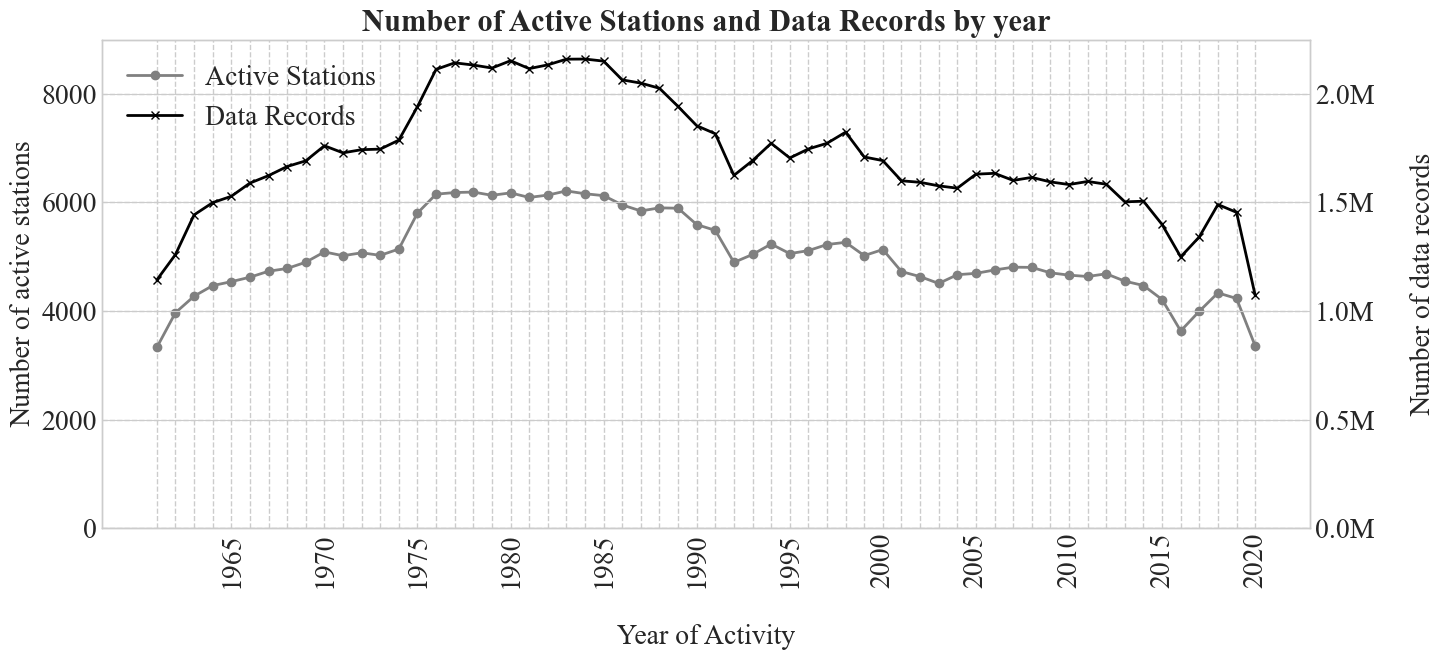

In [27]:
def millions_formatter(x, pos):
    return f'{round(x/1e6,2)}M'

plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams['font.size'] = '20'
plt.rcParams["font.family"] = "Times New Roman"
tnr_title = {'fontname':'Times New Roman', "fontweight" :"bold", 'fontsize': 22}

fig, ax1 = plt.subplots(figsize=(15, 7))

ax1.plot(data['Year'], data['Code'], color='grey',marker='o', label='Active Stations', linewidth=2)
ax1.set_xticks(data['Year'].values.tolist())
ax1.set_xticklabels(xticklabels_list,  rotation = 90)
ax1.set_ylim(0, 9000)
ax1.grid(linestyle = '--', linewidth = 1, axis='both')

ax2 = ax1.twinx()
ax2.plot(df_year_records['year'], df_year_records['record_count'], color='black', marker='x', label='Data Records', linewidth=2)
ax2.set_ylim(0, 2250000)
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(millions_formatter))
# ax2.set_xticklabels([])


ax1.set_xlabel('\nYear of Activity')
ax1.set_ylabel('Number of active stations')
ax2.set_ylabel('\nNumber of data records')

plt.title("Number of Active Stations and Data Records by year", **tnr_title)
plt.setp(plt.gca().get_xticklabels(), rotation=90)


# Legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels() 
ax2.legend(lines + lines2, labels + labels2, loc='upper left')
# ax1.legend(loc='upper left')

plt.tight_layout() 

plt.savefig(general_path+'/Figures/stations_and_records_by_year_1961_2020.jpeg', format='jpeg', dpi=1200, bbox_inches='tight') 
plt.show()
plt.close()

In [28]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from statsmodels.tsa.seasonal import seasonal_decompose

# plt.rcParams['font.size'] = '12'
# plt.rcParams["font.family"] = "Times New Roman"

# # Assuming your DataFrame is named 'df' with columns 'Date' and 'QualityIndex'
# # If not, replace 'Date' and 'QualityIndex' with your actual column names
# df = data.copy()

# # Data Inspection
# print(df.info())
# print(df.describe())

# # Convert 'Date' column to datetime format
# df['Year'] = pd.to_datetime(df['Year'])

# # Visualizations
# plt.figure(figsize=(12, 6))
# plt.plot(df['Year'], df['Code'])
# plt.title('Time Series Plot of Quality Index')
# plt.xlabel('Year')
# plt.ylabel('Code')
# plt.show()

# # Descriptive Statistics
# print("Mean:", df['Code'].mean())
# print("Median:", df['Code'].median())
# print("Standard Deviation:", df['Code'].std())

# # Time Series Decomposition
# result = seasonal_decompose(df['Code'], model='additive', period=1)
# result.plot()
# plt.show()

# # Correlation Analysis
# correlation_matrix = df.corr()
# print("Correlation Matrix:")
# print(correlation_matrix)

# # Outlier Detection (using Z-score as an example)
# z_scores = (df['Code'] - df['Code'].mean()) / df['Code'].std()
# outliers = df[abs(z_scores) > 3]

# # Statistical Modeling (using ARIMA as an example)
# # Install statsmodels with: pip install statsmodels
# from statsmodels.tsa.arima.model import ARIMA

# model = ARIMA(df['Code'], order=(1, 1, 1))
# results = model.fit()
# print(results.summary())

# # Forecasting (example for the next 5 periods)
# forecast_values = results.predict(start=len(df), end=len(df) + 4, typ='levels')
# print("Forecasted Values:")
# print(forecast_values)

### STATIONS BY RESPONSIBLE AGENGY

In [29]:
df_agency = df_downloaded_station_info[['Responsible', 'Code']]
df_agency = pd.DataFrame(df_agency.groupby('Responsible')['Code'].count()).reset_index(drop=False)
# df_station_by_year
# data_agency = pd.pivot_table(df_agency, values='Code', index=['Responsible'], aggfunc=np.min)
# data_agency.sort_values('Code', inplace=True, ascending=False)
# data_agency.reset_index(inplace=True)
df_agency['Code'].sum()

11128

In [30]:
df_agency.sort_values('Code', inplace=True, ascending=False)
df_agency = df_agency[df_agency['Code']>=200]
resp_list = df_agency['Responsible'].values.tolist()
resp_list

['ANA',
 'DAEE-SP',
 'SUDENE',
 'AGUASPARANÁ',
 'FUNCEME-CE',
 'INMET',
 'DNOCS',
 'AESA-PB']

In [31]:
labels = df_agency['Code'].values.tolist()
labels

[3490, 1486, 1270, 802, 781, 607, 547, 207]

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  antialiased: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `~matplotlib.transforms.BboxBase` or None
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  figure: `~matplotlib.figure.Figure`
  fontfamily or family or fontname: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-e

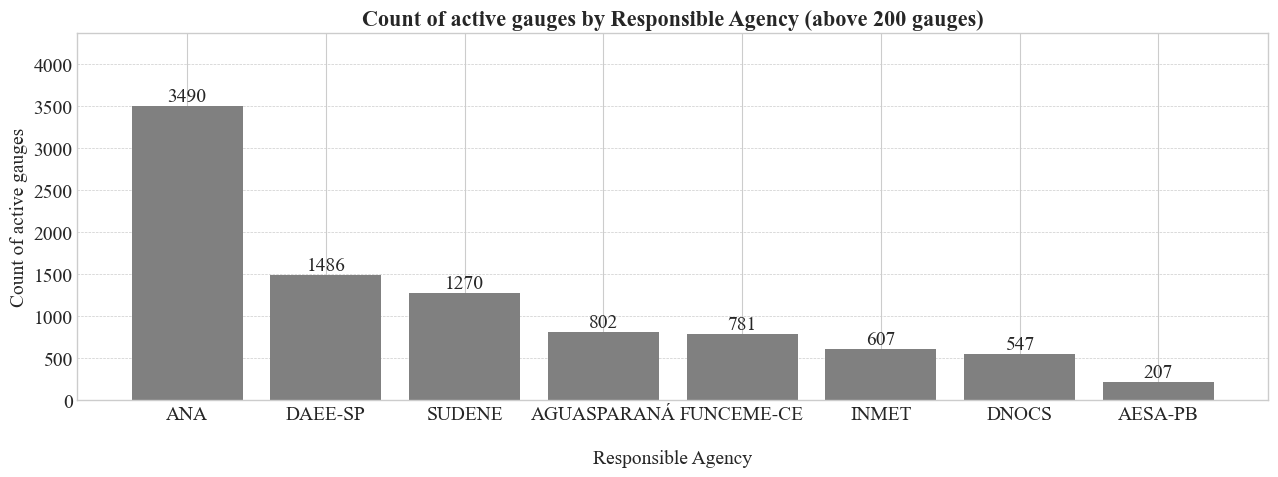

In [32]:
tnr_title = {'fontname':'Times New Roman', "fontweight" :"bold", 'fontsize': 16}
plt.rcParams['font.size'] = '14'
plt.rcParams["font.family"] = "Times New Roman"

fig, ax = plt.subplots(figsize=(13, 5))
ax.bar(df_agency['Responsible'], df_agency['Code'], color='grey')

ax.set_ylim(None,max(labels)*1.25)
ax.set_xlabel("\nResponsible Agency")
ax.set_ylabel("Count of active gauges")
ax.grid(linestyle = '--', linewidth = 0.5, axis="y")


# Make some labels.
rects = ax.patches
  
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height+15, label,
            ha='center', va='bottom')

plt.title("Count of active gauges by Responsible Agency (above 200 gauges)", **tnr_title)
plt.setp(plt.gca().get_xticklabels())
plt.setp(plt.gca().get_yticklabels())

plt.tight_layout()
plt.show()
plt.savefig(general_path+'/Figures/stations_by_agency_1961_2020.jpeg', format='jpeg', dpi=1200, bbox_inches='tight') 
plt.close()

# SPATIAL ANALYSIS

In [33]:
plt.style.use("seaborn-v0_8-whitegrid")
SHP = gpd.read_file(general_path + '/SHP/Brazilian_Border.shp')

C:\Users\linde\AppData\Roaming\Python\Python311\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


In [34]:
df_station_by_year = pd.read_hdf(general_path + '/Consolidated Files/BRASIL_RAW_STATION_BY_YEAR.h5')
df_station_by_year = df_station_by_year[(df_station_by_year['Year']>= 1961) & (df_station_by_year['Year'] <= 2020)]
df_station_by_year['Count'] = 1
df_station_by_year = pd.DataFrame(df_station_by_year.groupby('Code')['Count'].sum()).reset_index(drop=False)
df_station_by_year

,Code,Count
0,00047000,4
1,00047002,44
2,00047003,40
3,00047004,39
4,00047005,32
...,...,...
11123,08460003,23
11124,08460004,19
11125,08461000,36
11126,08464001,25


In [35]:
bins = [0, 30, 60, 90]
df_downloaded_station_info_bins = df_downloaded_station_info.copy(deep = True).set_index('Code')
df_downloaded_station_info_bins.reset_index(inplace=True, drop = False)
df_downloaded_station_info_bins =  pd.merge(df_station_by_year, df_downloaded_station_info_bins, how = 'left', on = 'Code')
df_downloaded_station_info_bins

,Code,Count,Name,Type,SubBasin,City,State,Responsible,Latitude,Longitude,StartDate,EndDate,NYD,MD,N_YWOMD,YWMD
0,00047000,4,SALINÓPOLIS,2,32,SALINÓPOLIS,PARÁ,INMET,-0.6500,-47.5500,1958/01/01,1964/12/31,7,25.0,0,100.0
1,00047002,44,SALINÓPOLIS,2,32,SALINÓPOLIS,PARÁ,ANA,-0.6231,-47.3536,1977/12/09,2019/08/31,43,3.5,35,18.6
2,00047003,40,CURUÇA,2,32,CURUÇA,PARÁ,ANA,-0.7375,-47.8536,1981/07/01,2019/07/31,39,2.4,29,25.6
3,00047004,39,PRIMAVERA,2,32,PRIMAVERA,PARÁ,ANA,-0.9294,-47.0994,1982/02/18,2019/08/31,38,0.0,35,7.9
4,00047005,32,MARUDA,2,32,MARAPANIM,PARÁ,ANA,-0.6336,-47.6583,1989/08/21,2019/07/31,31,5.0,20,35.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11123,08460003,23,ÁGUA FRIA,2,14,UIRAMUTA,RORAIMA,ANA,4.6428,-60.4964,1996/03/02,2018/04/30,23,1.8,16,30.4
11124,08460004,19,UIRAMUTA,2,14,UIRAMUTA,RORAIMA,ANA,4.5986,-60.1664,2002/07/13,2019/07/31,18,2.3,12,33.3
11125,08461000,36,NOVA ESPERANÇA/MARCO BV-8,2,14,PACARAIMA,RORAIMA,ANA,4.4883,-61.1297,1984/03/23,2019/06/30,36,12.3,13,63.9
11126,08464001,25,MISSÃO AUARIS - JUSANTE,2,14,BOA VISTA,RORAIMA,ANA,4.0031,-64.4431,1995/04/01,2019/06/30,25,4.2,15,40.0


In [36]:
df_bins = pd.DataFrame(pd.cut(df_downloaded_station_info_bins['Count'], bins = bins, include_lowest=False))
df_bins['Code'] = df_downloaded_station_info_bins['Code']
df_bins.columns = ['Bin', 'Code']
df_bins

,Bin,Code
0,"(0, 30]",00047000
1,"(30, 60]",00047002
2,"(30, 60]",00047003
3,"(30, 60]",00047004
4,"(30, 60]",00047005
...,...,...
11123,"(0, 30]",08460003
11124,"(0, 30]",08460004
11125,"(30, 60]",08461000
11126,"(0, 30]",08464001


In [37]:
df_downloaded_station_info_bins_cut = pd.merge(df_bins, df_downloaded_station_info_bins, on = 'Code',how = 'left')
df_downloaded_station_info_bins_cut

,Bin,Code,Count,Name,Type,SubBasin,City,State,Responsible,Latitude,Longitude,StartDate,EndDate,NYD,MD,N_YWOMD,YWMD
0,"(0, 30]",00047000,4,SALINÓPOLIS,2,32,SALINÓPOLIS,PARÁ,INMET,-0.6500,-47.5500,1958/01/01,1964/12/31,7,25.0,0,100.0
1,"(30, 60]",00047002,44,SALINÓPOLIS,2,32,SALINÓPOLIS,PARÁ,ANA,-0.6231,-47.3536,1977/12/09,2019/08/31,43,3.5,35,18.6
2,"(30, 60]",00047003,40,CURUÇA,2,32,CURUÇA,PARÁ,ANA,-0.7375,-47.8536,1981/07/01,2019/07/31,39,2.4,29,25.6
3,"(30, 60]",00047004,39,PRIMAVERA,2,32,PRIMAVERA,PARÁ,ANA,-0.9294,-47.0994,1982/02/18,2019/08/31,38,0.0,35,7.9
4,"(30, 60]",00047005,32,MARUDA,2,32,MARAPANIM,PARÁ,ANA,-0.6336,-47.6583,1989/08/21,2019/07/31,31,5.0,20,35.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11123,"(0, 30]",08460003,23,ÁGUA FRIA,2,14,UIRAMUTA,RORAIMA,ANA,4.6428,-60.4964,1996/03/02,2018/04/30,23,1.8,16,30.4
11124,"(0, 30]",08460004,19,UIRAMUTA,2,14,UIRAMUTA,RORAIMA,ANA,4.5986,-60.1664,2002/07/13,2019/07/31,18,2.3,12,33.3
11125,"(30, 60]",08461000,36,NOVA ESPERANÇA/MARCO BV-8,2,14,PACARAIMA,RORAIMA,ANA,4.4883,-61.1297,1984/03/23,2019/06/30,36,12.3,13,63.9
11126,"(0, 30]",08464001,25,MISSÃO AUARIS - JUSANTE,2,14,BOA VISTA,RORAIMA,ANA,4.0031,-64.4431,1995/04/01,2019/06/30,25,4.2,15,40.0


In [38]:
df_downloaded_station_geo = df_downloaded_station_info_bins_cut[['Code', 'Latitude', 'Longitude','Type', 'Count', 'Bin']]
geometry = gpd.points_from_xy(df_downloaded_station_geo['Longitude'], df_downloaded_station_geo['Latitude'])
stations_local_geo = gpd.GeoDataFrame(df_downloaded_station_geo, geometry=geometry, crs="EPSG:4326")
stations_local_geo

C:\Users\linde\AppData\Roaming\Python\Python311\site-packages\geopandas\geodataframe.py:34: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  out = from_shapely(data)


,Code,Latitude,Longitude,Type,Count,Bin,geometry
0,00047000,-0.6500,-47.5500,2,4,"(0, 30]",POINT (-47.55000 -0.65000)
1,00047002,-0.6231,-47.3536,2,44,"(30, 60]",POINT (-47.35360 -0.62310)
2,00047003,-0.7375,-47.8536,2,40,"(30, 60]",POINT (-47.85360 -0.73750)
3,00047004,-0.9294,-47.0994,2,39,"(30, 60]",POINT (-47.09940 -0.92940)
4,00047005,-0.6336,-47.6583,2,32,"(30, 60]",POINT (-47.65830 -0.63360)
...,...,...,...,...,...,...,...
11123,08460003,4.6428,-60.4964,2,23,"(0, 30]",POINT (-60.49640 4.64280)
11124,08460004,4.5986,-60.1664,2,19,"(0, 30]",POINT (-60.16640 4.59860)
11125,08461000,4.4883,-61.1297,2,36,"(30, 60]",POINT (-61.12970 4.48830)
11126,08464001,4.0031,-64.4431,2,25,"(0, 30]",POINT (-64.44310 4.00310)


In [39]:
br_map = geobr.read_state(year = 2020)
br_map.crs = "EPSG:4326"
br_map['name_state'] = br_map['name_state'].apply(str.upper)
br_map = br_map.sort_values(by = ['name_state'])
br_map['name_state'].replace({'AMAZÔNAS': 'AMAZONAS'}, inplace = True)
br_map.head()

C:\Users\linde\AppData\Roaming\Python\Python311\site-packages\geopandas\array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out
C:\Users\linde\AppData\Local\Temp\ipykernel_16724\948283981.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  br_map['name_state'].replace({'AMAZÔNAS': 'AMAZONAS'}, inplace = True)


,code_state,abbrev_state,name_state,code_region,name_region,geometry
1,12.0,AC,ACRE,1.0,Norte,"MULTIPOLYGON (((-71.07772 -9.82774, -71.07817 ..."
13,27.0,AL,ALAGOAS,2.0,Nordeste,"MULTIPOLYGON (((-35.75791 -9.69285, -35.75801 ..."
5,16.0,AP,AMAPÁ,1.0,Norte,"MULTIPOLYGON (((-50.45011 2.10924, -50.44715 2..."
2,13.0,AM,AMAZONAS,1.0,Norte,"MULTIPOLYGON (((-69.83766 -3.68659, -69.82555 ..."
15,29.0,BA,BAHIA,2.0,Nordeste,"MULTIPOLYGON (((-38.69616 -17.97901, -38.69618..."


## Station Count by UF

In [40]:
data_state.columns = ['name_state', 'station_count']
data_state['station_count'].sum()

11128

In [41]:
br_map_count = br_map.merge(data_state, on = 'name_state', how = 'left')
br_map_count = br_map_count.sort_values(by = ['name_state'])
br_map_count = gpd.GeoDataFrame(br_map_count)
br_map_count['centroid'] = gpd.GeoSeries(br_map_count['geometry']).centroid
br_map_count['station_count'] = br_map_count['station_count'].astype(int)
br_map_count = gpd.GeoDataFrame(br_map_count)
br_map_count

C:\Users\linde\AppData\Roaming\Python\Python311\site-packages\geopandas\array.py:546: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return _unary_geo("centroid", self)
C:\Users\linde\AppData\Roaming\Python\Python311\site-packages\geopandas\geoseries.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  data = from_shapely(s.values)


,code_state,abbrev_state,name_state,code_region,name_region,geometry,station_count,centroid
0,12.0,AC,ACRE,1.0,Norte,"MULTIPOLYGON (((-71.07772 -9.82774, -71.07817 ...",50,POINT (-70.47293 -9.21327)
1,27.0,AL,ALAGOAS,2.0,Nordeste,"MULTIPOLYGON (((-35.75791 -9.69285, -35.75801 ...",109,POINT (-36.62485 -9.51367)
2,16.0,AP,AMAPÁ,1.0,Norte,"MULTIPOLYGON (((-50.45011 2.10924, -50.44715 2...",38,POINT (-51.96202 1.44746)
3,13.0,AM,AMAZONAS,1.0,Norte,"MULTIPOLYGON (((-69.83766 -3.68659, -69.82555 ...",264,POINT (-64.65309 -4.15410)
4,29.0,BA,BAHIA,2.0,Nordeste,"MULTIPOLYGON (((-38.69616 -17.97901, -38.69618...",1192,POINT (-41.72116 -12.47533)
5,23.0,CE,CEARÁ,2.0,Nordeste,"MULTIPOLYGON (((-41.18292 -4.01797, -41.18552 ...",1133,POINT (-39.61579 -5.09322)
6,53.0,DF,DISTRITO FEDERAL,5.0,Centro Oeste,"MULTIPOLYGON (((-47.41734 -15.54655, -47.41720...",83,POINT (-47.79685 -15.78117)
7,32.0,ES,ESPÍRITO SANTO,3.0,Sudeste,"MULTIPOLYGON (((-40.75189 -20.92722, -40.75193...",169,POINT (-40.66851 -19.57518)
8,52.0,GO,GOIÁS,5.0,Centro Oeste,"MULTIPOLYGON (((-52.36102 -16.08160, -52.36040...",224,POINT (-49.62251 -16.04119)
9,21.0,MA,MARANHÃO,2.0,Nordeste,"MULTIPOLYGON (((-44.96620 -1.27114, -44.96081 ...",240,POINT (-45.28777 -5.07221)


C:\Users\linde\AppData\Roaming\Python\Python311\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
c:\anaconda3\Lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\linde\AppData\Roaming\Python\Python311\site-packages\geopandas\array.py:546: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return _unary_geo("centroid", self)
C:\Users\linde\AppData\Roaming\Python\Python311\site-packages\geopandas\geoseries.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. C

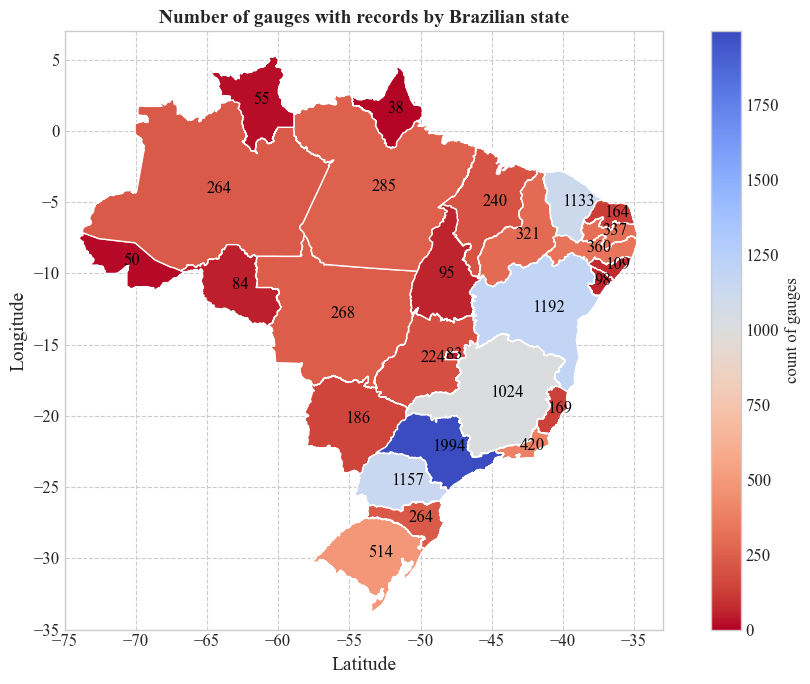

In [42]:
plt.rcParams['font.size'] = '12'
plt.rcParams["font.family"] = "Times New Roman"
tnr_title = {'fontname':'Times New Roman', "fontweight" :"bold", 'fontsize': 14}


fig, ax = plt.subplots(figsize = (10, 7))
br_map_count.plot(ax = ax
                    , edgecolor = 'white'
                    , column = 'station_count'
                    , legend = False
                    , cmap = 'coolwarm_r'
                    , alpha = 1.0
                   )
ax.set_title("Number of gauges with records by Brazilian state", tnr_title)

#Colocando nome em cada ponto
for x, y, label in zip(br_map_count.centroid.x, br_map_count.centroid.y, br_map_count.station_count):
   ax.annotate(label, xy=(x, y), xytext=(-4, -2), textcoords="offset points", color = "black",  rotation=0)

# ax.legend(loc="lower right", prop={'size':1}, shadow = False)
fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(0, br_map_count['station_count'].max()), cmap='coolwarm_r'),
             ax=ax, orientation='vertical', label='count of gauges')
ax.set_ylim([-35, 7])
ax.set_xlim([-75, -33])
ax.set_xlabel('Latitude', fontsize=14)
ax.set_ylabel('Longitude', fontsize=14)
ax.grid(ls='--')
plt.tight_layout()
plt.savefig(general_path+'/Figures/ANA_stations_count_by_state_1961_2020.jpeg', format='jpeg', dpi=1200, transparent=False, bbox_inches=None)
plt.show()
plt.close()

In [43]:
df_density = pd.read_excel(general_path+"/Docs/station_density.xlsx", sheet_name = "densidade")
df_density = df_density.sort_values(by = ['Unidade_Federativa'])
df_density.columns = ['name_state',  'region', 'area', 'prev_station_count', 'density']
df_density = df_density[['name_state',  'area']]
df_density

,name_state,area
0,ACRE,164123.964
1,ALAGOAS,27848.140
2,AMAPÁ,142470.762
3,AMAZONAS,1559167.889
4,BAHIA,564760.427
5,CEARÁ,148894.441
6,DISTRITO FEDERAL,5760.783
7,ESPÍRITO SANTO,46074.447
8,GOIÁS,340203.329
9,MARANHÃO,329642.182


In [44]:
br_map_density = br_map_count.merge(df_density, on = 'name_state', how = 'left')
br_map_density = br_map_density.sort_values(by = ['name_state'])
br_map_density = gpd.GeoDataFrame(br_map_density)
br_map_density['centroid'] = gpd.GeoSeries(br_map_density['geometry']).centroid
br_map_density['density'] = br_map_density['area'] / br_map_density['station_count']
br_map_density['density'] = br_map_density['density'].astype(int)
br_map_density = gpd.GeoDataFrame(br_map_density)
br_map_density

C:\Users\linde\AppData\Roaming\Python\Python311\site-packages\geopandas\array.py:546: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return _unary_geo("centroid", self)
C:\Users\linde\AppData\Roaming\Python\Python311\site-packages\geopandas\geoseries.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  data = from_shapely(s.values)


,code_state,abbrev_state,name_state,code_region,name_region,geometry,station_count,centroid,area,density
0,12.0,AC,ACRE,1.0,Norte,"MULTIPOLYGON (((-71.07772 -9.82774, -71.07817 ...",50,POINT (-70.47293 -9.21327),164123.964,3282
1,27.0,AL,ALAGOAS,2.0,Nordeste,"MULTIPOLYGON (((-35.75791 -9.69285, -35.75801 ...",109,POINT (-36.62485 -9.51367),27848.140,255
2,16.0,AP,AMAPÁ,1.0,Norte,"MULTIPOLYGON (((-50.45011 2.10924, -50.44715 2...",38,POINT (-51.96202 1.44746),142470.762,3749
3,13.0,AM,AMAZONAS,1.0,Norte,"MULTIPOLYGON (((-69.83766 -3.68659, -69.82555 ...",264,POINT (-64.65309 -4.15410),1559167.889,5905
4,29.0,BA,BAHIA,2.0,Nordeste,"MULTIPOLYGON (((-38.69616 -17.97901, -38.69618...",1192,POINT (-41.72116 -12.47533),564760.427,473
5,23.0,CE,CEARÁ,2.0,Nordeste,"MULTIPOLYGON (((-41.18292 -4.01797, -41.18552 ...",1133,POINT (-39.61579 -5.09322),148894.441,131
6,53.0,DF,DISTRITO FEDERAL,5.0,Centro Oeste,"MULTIPOLYGON (((-47.41734 -15.54655, -47.41720...",83,POINT (-47.79685 -15.78117),5760.783,69
7,32.0,ES,ESPÍRITO SANTO,3.0,Sudeste,"MULTIPOLYGON (((-40.75189 -20.92722, -40.75193...",169,POINT (-40.66851 -19.57518),46074.447,272
8,52.0,GO,GOIÁS,5.0,Centro Oeste,"MULTIPOLYGON (((-52.36102 -16.08160, -52.36040...",224,POINT (-49.62251 -16.04119),340203.329,1518
9,21.0,MA,MARANHÃO,2.0,Nordeste,"MULTIPOLYGON (((-44.96620 -1.27114, -44.96081 ...",240,POINT (-45.28777 -5.07221),329642.182,1373


C:\Users\linde\AppData\Roaming\Python\Python311\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
c:\anaconda3\Lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\linde\AppData\Roaming\Python\Python311\site-packages\geopandas\array.py:546: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return _unary_geo("centroid", self)
C:\Users\linde\AppData\Roaming\Python\Python311\site-packages\geopandas\geoseries.py:128: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. C

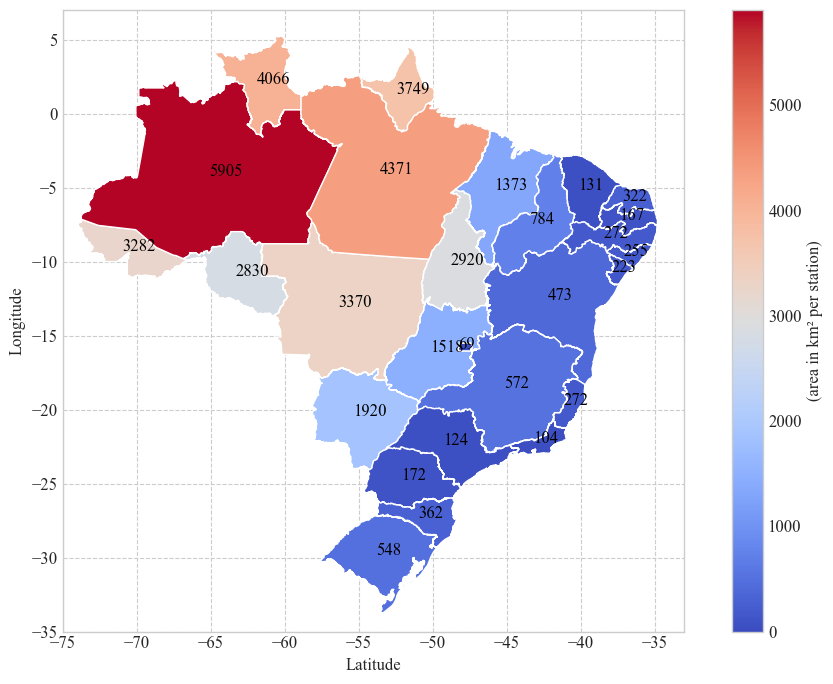

In [71]:
plt.rcParams['font.size'] = '12'
plt.rcParams["font.family"] = "Times New Roman"
tnr_title = {'fontname':'Times New Roman', "fontweight" :"bold", 'fontsize': 14}

# Define custom colormap
colors = [(0.3, 0.3, 0.9),  (173/256, 216/256, 1),(0.9, 0.9, 0.9), (0.7, 0, 0)]  # RGB values
positions = [0, 0.03,  0.5, 1]  # Color positions from 0 to 1

custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', list(zip(positions, colors)))

fig, ax = plt.subplots(figsize = (10, 7))
br_map_density.plot(ax = ax
                    , edgecolor = 'white'
                    , column = 'density'
                    , legend = False
                    , cmap = 'coolwarm'
                    , alpha = 1.0
                   )
# ax.set_title("Density of gauges by Brazilian state (area in km² per station)", **tnr_title)
ax.set_ylim([-35, 7])
ax.set_xlim([-75, -33])
#Colocando nome em cada ponto
for x, y, label in zip(br_map_density.centroid.x, br_map_density.centroid.y, br_map_density.density):
   ax.annotate(label, xy=(x, y), xytext=(-5, -1), textcoords="offset points", color = "black",  rotation=0)

# ax.legend(loc="lower right", prop={'size':1}, shadow = False)
fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(0, br_map_density['density'].max()), cmap='coolwarm'),
             ax=ax, orientation='vertical', label='(area in km² per station)')

ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.grid(ls='--')
plt.tight_layout()
plt.savefig(general_path+'/Figures/ANA_stations_density_by_state_1961_2020.jpeg', format='jpeg', dpi=1200, transparent=False, bbox_inches=None)
plt.show()
plt.close()

## 30 YEARS OF DATA

In [46]:
# df_downloaded_station_geo_30 = df_downloaded_station_geo[df_downloaded_station_geo['Count'] < 30]
# geometry = gpd.points_from_xy(df_downloaded_station_geo_30['Longitude'], df_downloaded_station_geo_30['Latitude'])
# stations_local_geo_30 = gpd.GeoDataFrame(df_downloaded_station_geo_30, geometry=geometry, crs="EPSG:4326")
# stations_local_geo_30

In [47]:
# fig, ax = plt.subplots(figsize = (10, 7))
# SHP.plot(ax = ax, color = 'w')
# br_map.plot(ax = ax, color = 'white', edgecolor = 'black')
# stations_local_geo_30.plot(ax = ax
#                            , cmap = 'Greys_r'
#                            , s = 1
#                            , legend = False
#                            , column = 'Type')

# #Colocando nome em cada ponto
# #for x, y, label in zip(postos1.geometry.x, postos1.geometry.y, postos1.city):
# #    ax.annotate(label, xy=(x, y), xytext=(-10, -1), textcoords="offset points", color = "k",  rotation=-25)
# ax.set_ylim([-34.9, 7])
# ax.set_xlim([-74.9, -33])

# ax.set_title('Distribution of gauges\nwith less than 30 years of data record', fontsize=18)
# ax.set_xlabel('Latitude', fontsize=16)
# ax.set_ylabel('Longitude', fontsize=16)
# ax.grid(ls='--')
# # ax.legend(loc="lower right", prop={'size':1}, shadow = False)
# plt.tight_layout()
# plt.savefig(general_path+'/Figures/ANA_stations_less_30.jpeg', format='jpeg', dpi=1200, transparent=False, bbox_inches=None)
# plt.show()
# plt.close()

## 60 YEARS OF DATA

In [48]:
# df_downloaded_station_geo_60 = df_downloaded_station_geo[df_downloaded_station_geo['Count'] >= 30]
# geometry = gpd.points_from_xy(df_downloaded_station_geo_60['Longitude'], df_downloaded_station_geo_60['Latitude'])
# stations_local_geo_60 = gpd.GeoDataFrame(df_downloaded_station_geo_60, geometry=geometry, crs="EPSG:4326")
# stations_local_geo_60

In [49]:
# fig, ax = plt.subplots(figsize = (10, 7))
# SHP.plot(ax = ax, color = 'w')
# br_map.plot(ax = ax, color = 'white', edgecolor = 'black')
# stations_local_geo_60.plot(ax = ax, cmap = 'Greys_r', s = 1, legend = False, column = 'Type')

# #Colocando nome em cada ponto
# #for x, y, label in zip(postos1.geometry.x, postos1.geometry.y, postos1.city):
# #    ax.annotate(label, xy=(x, y), xytext=(-10, -1), textcoords="offset points", color = "k",  rotation=-25)
# ax.set_ylim([-34.9, 7])
# ax.set_xlim([-74.9, -33])

# ax.set_title('Distribution of gauges\nwith 30 or more years of data records', fontsize=18)
# ax.set_xlabel('Latitude', fontsize=16)
# ax.set_ylabel('Longitude', fontsize=16)
# ax.grid(ls='--')
# plt.text(10, 10, 'n = ' , fontsize=12, **tnr_nrm)
# plt.tight_layout()
# plt.savefig(general_path+'/Figures/ANA_stations_more_30.jpeg', format='jpeg', dpi=1200, transparent=False, bbox_inches=None)
# plt.show()
# plt.close()

## ALL STATIONS

In [50]:
geometry = gpd.points_from_xy(df_downloaded_station_geo['Longitude'], df_downloaded_station_geo['Latitude'])
stations_local_geo = gpd.GeoDataFrame(df_downloaded_station_geo, geometry=geometry, crs="EPSG:4326")
stations_local_geo.sort_values(['Count'], ascending=True, inplace=True)
stations_local_geo

C:\Users\linde\AppData\Roaming\Python\Python311\site-packages\geopandas\geodataframe.py:34: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  out = from_shapely(data)


,Code,Latitude,Longitude,Type,Count,Bin,geometry
10911,03054017,-30.3408,-54.3169,2,1,"(0, 30]",POINT (-54.31690 -30.34080)
7568,02243320,-22.4850,-43.1503,2,1,"(0, 30]",POINT (-43.15030 -22.48500)
7569,02243321,-22.5481,-43.2089,2,1,"(0, 30]",POINT (-43.20890 -22.54810)
7570,02243322,-22.3333,-43.1331,2,1,"(0, 30]",POINT (-43.13310 -22.33330)
5679,01843010,-18.6500,-43.0833,2,1,"(0, 30]",POINT (-43.08330 -18.65000)
...,...,...,...,...,...,...,...
6732,02143022,-21.4994,-43.1536,2,60,"(30, 60]",POINT (-43.15360 -21.49940)
5911,01943008,-19.4403,-43.1186,2,60,"(30, 60]",POINT (-43.11860 -19.44030)
10378,02749000,-27.0381,-49.3950,2,60,"(30, 60]",POINT (-49.39500 -27.03810)
6726,02143016,-21.8692,-43.5556,2,60,"(30, 60]",POINT (-43.55560 -21.86920)


C:\Users\linde\AppData\Roaming\Python\Python311\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
c:\anaconda3\Lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\linde\AppData\Roaming\Python\Python311\site-packages\geopandas\plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
c:\anaconda3\Lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Conve

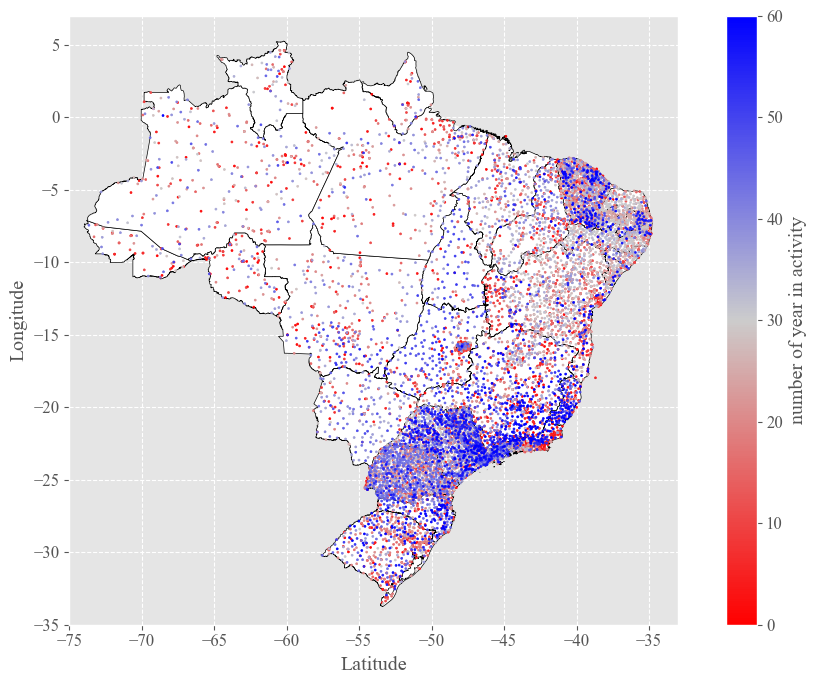

In [58]:
plt.rcParams['font.size'] = '12'
plt.rcParams["font.family"] = "Times New Roman"
tnr_title = {'fontname':'Times New Roman', "fontweight" :"bold", 'fontsize': 14}

# Define custom colormap
colors = [(1, 0, 0), (0.8, 0.8, 0.8), (0, 0, 1)]  # RGB values
positions = [0, 0.5, 1]  # Color positions from 0 to 1

custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', list(zip(positions, colors)))

fig, ax = plt.subplots(figsize = (10, 7))
SHP.plot(ax = ax, color = 'w')
br_map.plot(ax = ax, color = 'white', edgecolor = 'black')
stations_local_geo.plot(ax = ax
                        , cmap = custom_cmap
                        , s = 2
                        , legend = False
                        , column = 'Count'
                        , alpha = 1.0
                        )

#Colocando nome em cada ponto
#for x, y, label in zip(postos1.geometry.x, postos1.geometry.y, postos1.city):
#    ax.annotate(label, xy=(x, y), xytext=(-10, -1), textcoords="offset points", color = "k",  rotation=-25)
ax.set_ylim([-35, 7])
ax.set_xlim([-75, -33])

# ax.set_title('Distribution of gauges\nby count of years with data records')
ax.set_xlabel('Latitude')
ax.set_ylabel('Longitude')
ax.grid(ls='--')
# ax.legend(loc="lower right", prop={'size':1}, shadow = False)
fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(0, 60), cmap=custom_cmap),
             ax=ax, orientation='vertical', label='number of year in activity')

plt.tight_layout()
plt.savefig(general_path+'/Figures/ANA_stations_1961_2020.jpeg', format='jpeg', dpi=1200, transparent=False, bbox_inches=None)
plt.show()
plt.close()